# Red neuronal recurrente (RNN)

Las redes neuronales recurrentes, también conocidas como recurrence neural networks (RNNs) componen un área robusta y potente dentro en el ambito del Deep Learning, pues han sido especialmente diseñadas para trabajar con datos secuenciales y dependencias temporales. Desde el análisis de series temporales hasta la generación de texto, estas redes han demostrado ser fundamentales para resolver problemas donde el orden de los datos es clave. 

En este artículo, exploraremos su funcionamiento mediante un ejercicio práctico, que nos permitirá entrenar una RNN para realizar predicciones basadas en secuencias, entendiendo paso a paso cómo se procesan las dependencias temporales en los datos. Para ello, utilizaremos una RNN para predecir el siguiente valor de una secuencia temporal, en este caso, generaremos una secuencia sinosoidal para ello.

¡Comenzamos!

## 2. Importación de paquetes y librerías.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore") 

## 3. Carga y generación de datos.

Para iniciar el análisis, comenzamos generando los datos. Concretamente, crearemos 1000 secuencias (`num_samples`), cada una con una longitud de 50 (`seq_lenght`). Cada secuencia comenzará desde un punto inicial aleatorio y seguirá la forma de una función seno. El conjunto de datos X almacenará las secuencias sinusoidales generadas, mientras que y contendrá el valor siguiente correspondiente en cada secuencia.

In [2]:
num_samples = 1000
seq_length = 50

X = []
y = []

for _ in range(num_samples):
    start = np.random.rand() * 2 * np.pi
    sequence = np.sin(np.linspace(start, start + seq_length, seq_length))
    X.append(sequence)
    y.append(np.sin(start + seq_length))

X, y = np.array(X), np.array(y)

Procedemos a visualizar los datos para detenctar posibles tendencias y patrones.

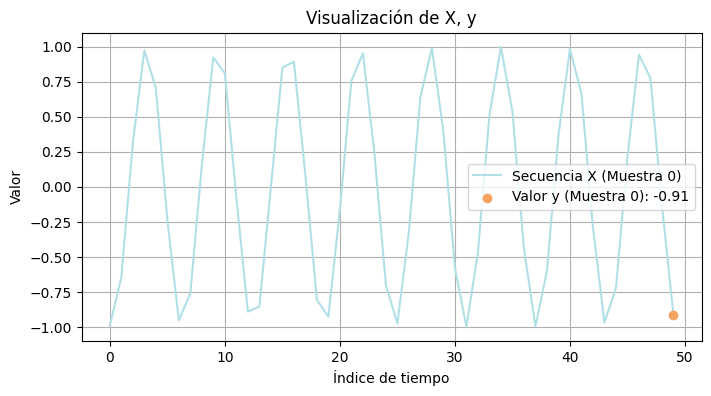

In [3]:
plt.figure(figsize=(8, 4))
plt.plot(X[0], label='Secuencia X (Muestra 0)', color='powderblue')
plt.scatter([seq_length - 1], [y[0]], color='sandybrown', label=f'Valor y (Muestra 0): {y[0]:.2f}', zorder=5)
plt.title('Visualización de X, y')
plt.xlabel('Índice de tiempo')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

El gráfico anterior muestra una secuencia sinusoidal representada por X (Muestra 0), junto con el valor y correspondiente al siguiente punto de la secuencia. Esto confirma que el conjunto y captura la continuidad de la secuencia, lo que es esencial para que la RNN aprenda dependencias temporales y realice predicciones precisas.

## 4. División de los datos.

A continuación, dividiremos los datos en dos conjuntos: _train_ y _test_. El conjunto de train se utilizará para entrenar la red, mientras que el conjunto de test servirá para evaluar su rendimiento con datos completamente nuevos. Para ello, asignaremos el 80% de los datos al train y el 20% restante al test.

In [4]:
# formato: [samples], [time steps], [features]
X = X.reshape((X.shape[0], X.shape[1], 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## 5. Entrenamiento del modelo.

Para entrenar el modelo, primero creamos un modelo secuencial, en el que las capas se organizan de manera consecutiva, de forma que cada una alimenta a la siguiente. Comenzamos añadiendo una capa RNN con la función de activación `tanh`, encargada de procesar las dependencias temporales de las secuencias de entrada. Finalmente, incorporamos una capa densa, cuya función es generar la predicción final para el siguiente valor de la secuencia. Este diseño permite que el modelo aprenda patrones en los datos y realice predicciones precisas basadas en el contexto temporal.

In [5]:
model = Sequential()
model.add(SimpleRNN(50, activation='tanh', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer="adam", loss='mean_squared_error')

Entranamiento del modelo aplicando la función fit:

In [6]:
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0478 - val_loss: 0.0032
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0022 - val_loss: 5.1677e-04
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.9578e-04 - val_loss: 2.0064e-05
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.0151e-05 - val_loss: 6.7967e-06
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.3139e-06 - val_loss: 5.3542e-06
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.0347e-06 - val_loss: 5.3918e-06
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.0830e-06 - val_loss: 4.0162e-06
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.0571e-06 - val_loss: 3.8052e-06
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.9417e-06 - val_loss: 4.6875e-06
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.0923e-06 - val_loss: 5.0898e-06
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.6647e-06 - val_loss: 2.8400e-

## 6. Evaluación de los resultados.

Por último, procedemos a evaluar el modelo entrenado utilizando el conjunto de datos de prueba (X_test y y_test). Primero, se calcula la pérdida (loss) con el método `model.evaluate`, que devuelve un valor de 8.32e-07, indicando un error mínimo entre las predicciones del modelo y los valores reales. 
Posteriormente, se generan las predicciones del modelo con `model.predict`, y se comparan con los valores reales mediante un bucle que imprime las primeras cinco muestras, mostrando tanto las predicciones como los valores objetivos correspondientes.

In [7]:
loss = model.evaluate(X_test, y_test)
print(f"Perdida del conjunto de prueba: {loss}")

predictions = model.predict(X_test)
print(f'Predicciones\t|\tValores reales')
for i in range(5):
    print(f'{predictions[i][0]:.6f} \t|\t {y_test[i]:.6f}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.3288e-07 
Perdida del conjunto de prueba: 9.103144975597388e-07
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicciones	|	Valores reales
-0.849252 	|	 -0.849550
-0.705127 	|	 -0.703890
0.986248 	|	 0.986374
-1.000166 	|	 -0.999487
0.511376 	|	 0.510371


Una vez evaluados los datos, se obtienen los siguientes puntos:
* La pérdida (loss) extremadamente baja sugiere que el modelo tiene un excelente rendimiento y es capaz de ajustar muy bien las secuencias sinusoidales a los datos esperados.
* Al observar las primeras cinco predicciones, se puede apreciar una gran precisión: cada predicción se aproxima casi perfectamente al valor real, con una diferencia de apenas unas milésimas.
* Este resultado indica que el modelo ha capturado eficazmente las dependencias temporales y ha generalizado bien, incluso con datos de prueba no utilizados durante el entrenamiento.

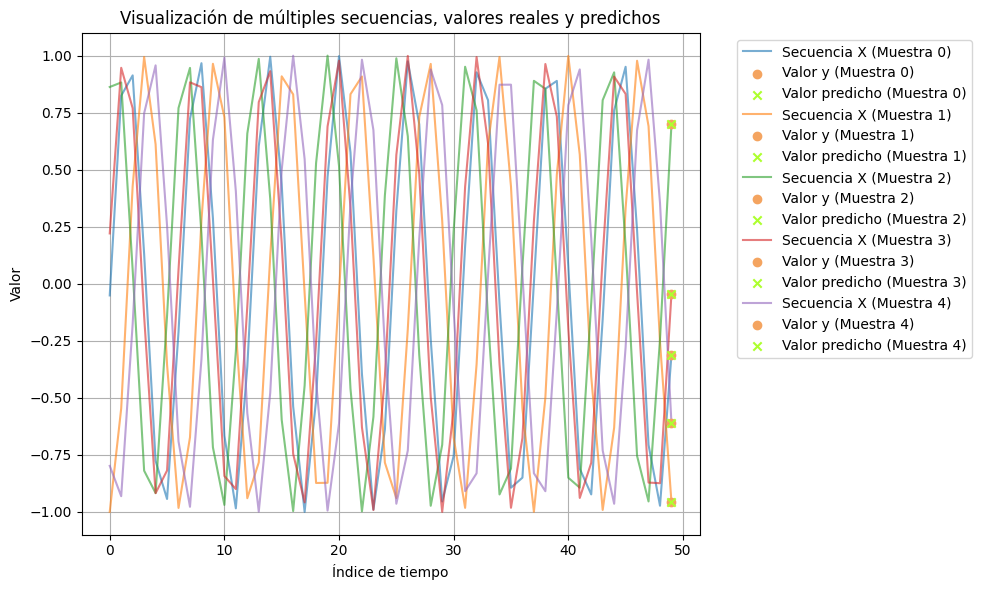

In [8]:
plt.figure(figsize=(10, 6))

for i in range(5):
    plt.plot(X_test[i+5], label=f'Secuencia X (Muestra {i})', alpha=0.6)  # Graficar la secuencia
    plt.scatter([seq_length - 1], [y_test[i+5]], label=f'Valor y (Muestra {i})', color='sandybrown', zorder=5, marker='o') 
    plt.scatter([seq_length - 1], [predictions[i+5]], label=f'Valor predicho (Muestra {i})', color='greenyellow', zorder=5, marker='x') 

plt.title('Visualización de múltiples secuencias, valores reales y predichos')
plt.xlabel('Índice de tiempo')
plt.ylabel('Valor')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.grid(True)
plt.tight_layout()
plt.show()

En conclusión, se extrae que el modelo muestra un desempeño notablemente bueno, con predicciones altamente precisas y un error prácticamente insignificante, lo que sugiere que está listo para ser aplicado en tareas similares de predicción secuencial.

Esperamos que el artículo haya sido de utilidad.

#### ¡Muchas gracias por leer!